<a href="https://colab.research.google.com/github/NestorCervantes/IAyRD_2024/blob/main/Arbol_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Actividad 4: Solución de problemas II
# Nombre del alumnos: Nestor Antonio Cervantes Estrada y Elian Isac González López
# Matrícula: 2023965 y 2082426
# Hora: N4

In [ ]:
# Paso 1. Importar librerías

# Librerías a utilizar

import pandas as pd
import matplotlib.pyplot as plt     # Graficar
from sklearn.model_selection import train_test_split     # Separar imagenes de prueba y de entrenamiento
from sklearn.tree import DecisionTreeClassifier     # Arbol de decisión
from sklearn.metrics import accuracy_score, classification_report     # Metrica de precisión
from sklearn import tree     # Arbol de decisión
from sklearn.impute import SimpleImputer      # Imputar datos
import random     # Generación de numeros aleatorios


In [ ]:
# Paso 2. Cargar datos

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nestorcervantes","key":"705678b7dc49f1e50b4960fd001703c1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data


Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 53.9MB/s]


In [ ]:
!unzip breast-cancer-wisconsin-data.zip -d breast_cancer_data

Archive:  breast-cancer-wisconsin-data.zip
  inflating: breast_cancer_data/data.csv  


In [ ]:
data_path = 'breast_cancer_data/data.csv'

# Cargar los datos en un DataFrame de pandas
data = pd.read_csv(data_path)
print(len(data))

569


In [75]:
# Paso 3. Preprocesamiento de los datos

# Eliminar columnas con todos los valores faltantes (opcional, dependiendo del conjunto de datos)
data = data.dropna(axis=1, how='all')

# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Imputar y convertir de nuevo a DataFrame de pandas
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las características y las etiquetas
print("Características (X_train):")
print(X_train.head())
print("\nEtiquetas (y_train):")
print(y_train.head())


Características (X_train):
             id  radius_mean  texture_mean  perimeter_mean  area_mean  \
68     859471.0        9.029         17.33           58.79      250.5   
181    873593.0       21.090         26.57          142.70     1311.0   
63     859196.0        9.173         13.86           59.20      260.9   
248  88466802.0       10.650         25.22           68.01      347.0   
60     858970.0       10.170         14.88           64.55      311.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
68           0.10660           0.14130         0.31300              0.04375   
181          0.11410           0.28320         0.24870              0.14960   
63           0.07721           0.08751         0.05988              0.02180   
248          0.09657           0.07234         0.02379              0.01615   
60           0.11340           0.08061         0.01084              0.01290   

     symmetry_mean  ...  radius_worst  texture_worst  perim

In [76]:
# Paso 4. Selección y entrenamiento del modelo

# Selección del modelo

clf = DecisionTreeClassifier()

In [77]:
# Entrenamiento del modelo

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
# Exactitud del modelo en el entrenamiento.
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy)


1.0


In [79]:
# Paso 5. Prueba del modelo

y_pred = clf.predict(X_test)

In [80]:
random_index = random.randint(0, len(y_test) - 1)

# Comparar la predicción aleatoria con la etiqueta real correspondiente
print("Índice aleatorio:", random_index)
print("Predicción:", y_pred[random_index])
print("Etiqueta real:", y_test.iloc[random_index])

Índice aleatorio: 35
Predicción: B
Etiqueta real: B


In [81]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))


Precisión del modelo: 0.94

Reporte de clasificación:
              precision    recall  f1-score   support

     Benigno       0.96      0.94      0.95        71
     Maligno       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



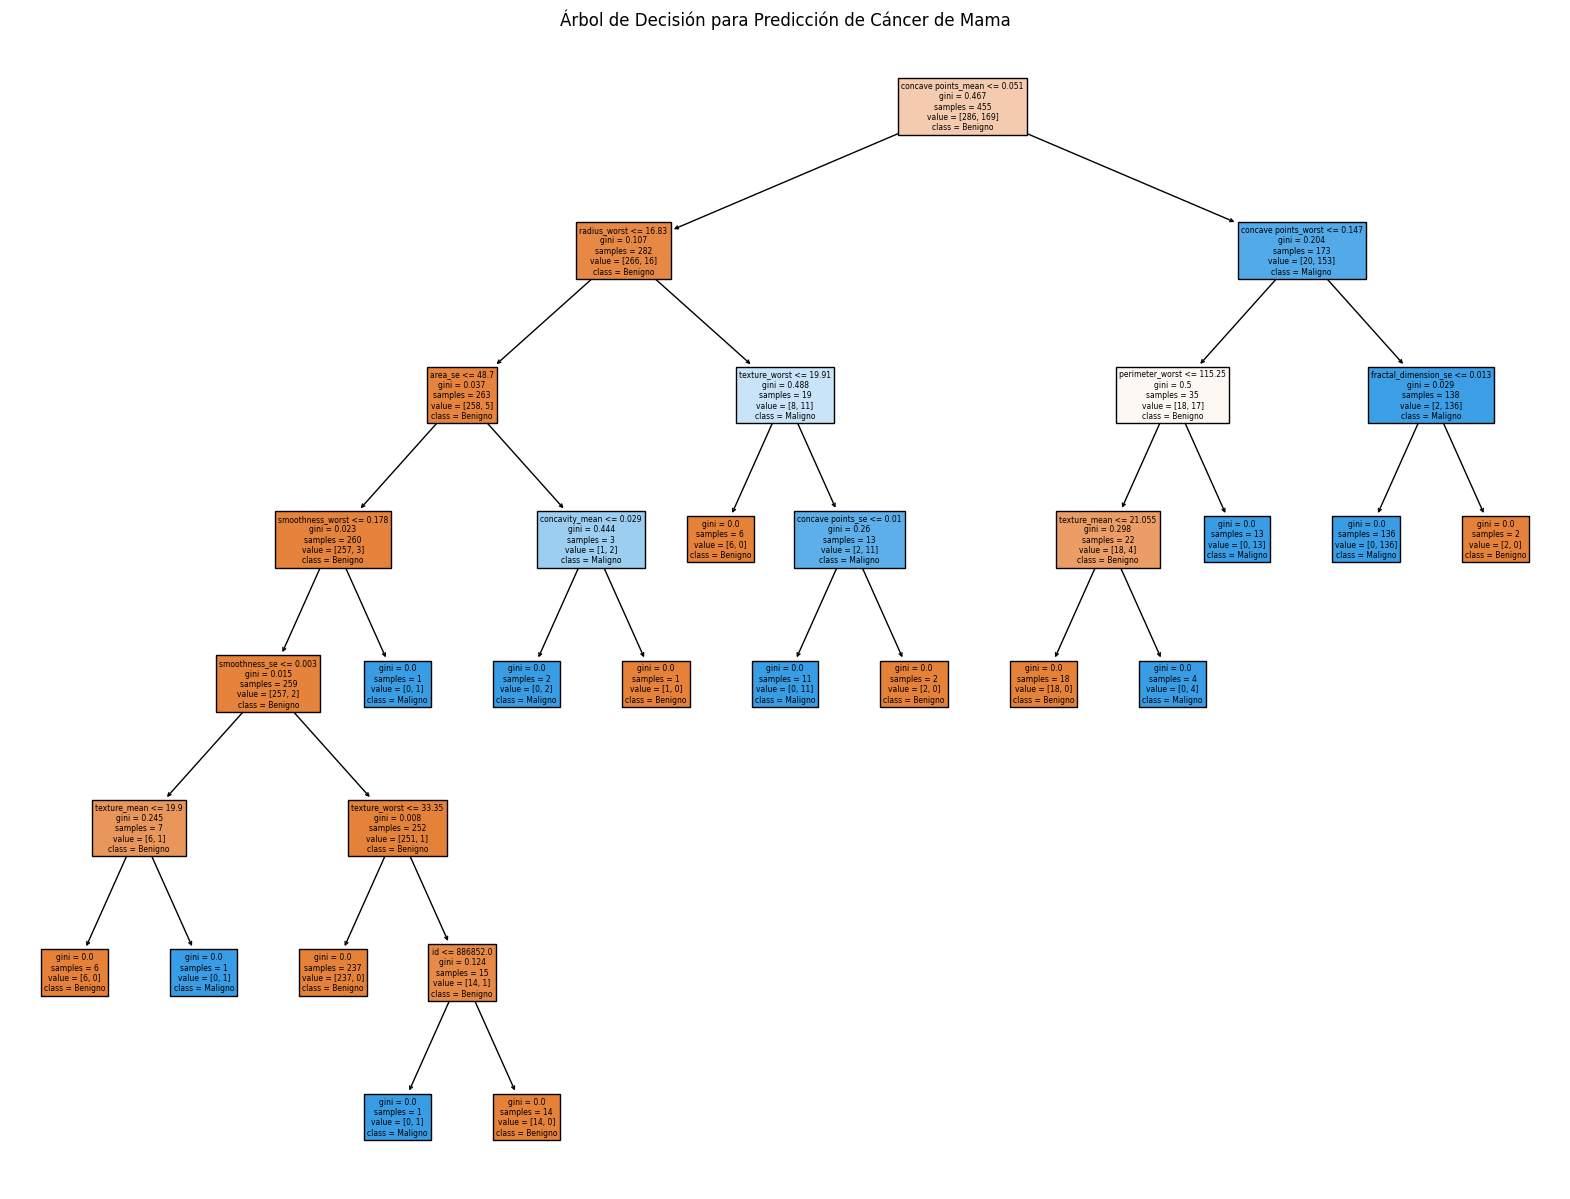

In [82]:
 # Arbol de decisión
plt.figure(figsize=(20, 15))  # Aumentar el tamaño de la figura para mejor resolución
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Benigno', 'Maligno'])
plt.title("Árbol de Decisión para Predicción de Cáncer de Mama")
plt.savefig("decision_tree.png", dpi=300)  # Aumentar el DPI para mejor resolución
plt.show()

